In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
X = np.abs(6 * np.random.rand(200, 1) - 3)
y =  (5 * X**2) + np.random.randn(200, 1) * 3

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

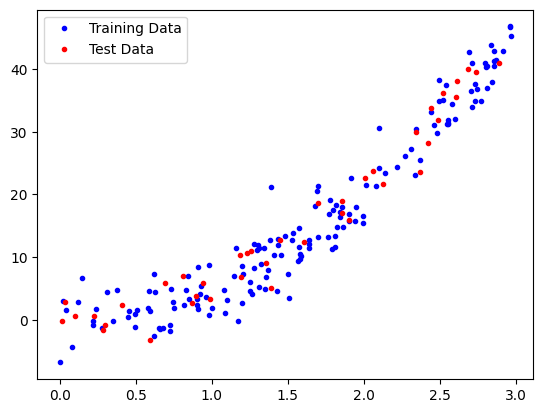

In [6]:
plt.plot(X_train,y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.legend()
plt.show()

# Applying PolynomialFeatures of high degree and make the model overfit

In [53]:
pf = PolynomialFeatures(degree=40,include_bias=True)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

In [54]:
lr = LinearRegression()
lr.fit(X_train_pf,y_train)
y_pred = lr.predict(X_test_pf)
print("MSE : ",mean_squared_error(y_test,y_pred))
print("R2_Score : ",r2_score(y_test,y_pred))

MSE :  13.035777237138353
R2_Score :  0.9291229931092745


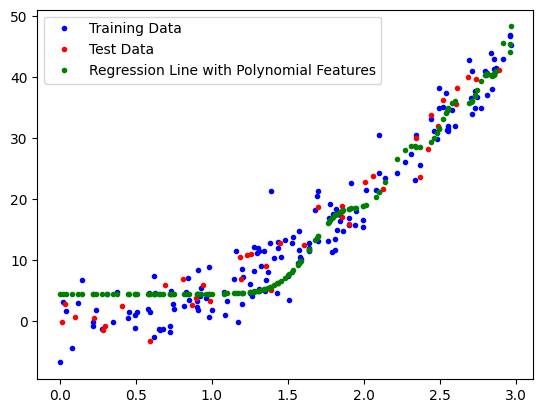

In [55]:
plt.plot(X_train,y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.plot(X_train,lr.predict(X_train_pf),'g.',label='Regression Line with Polynomial Features')
plt.legend()
plt.show()

# Applying Ridge to simplify the model and reduce complexity

In [56]:
ridge = Ridge(alpha=10)
X_train_ridge = ridge.fit(X_train_pf,y_train)
y_pred1 = ridge.predict(X_test_pf)
print('MSE : ',mean_squared_error(y_test,y_pred1))
print('R2_Score : ',r2_score(y_test,y_pred1))

MSE :  11.204395742745946
R2_Score :  0.9390804230680955


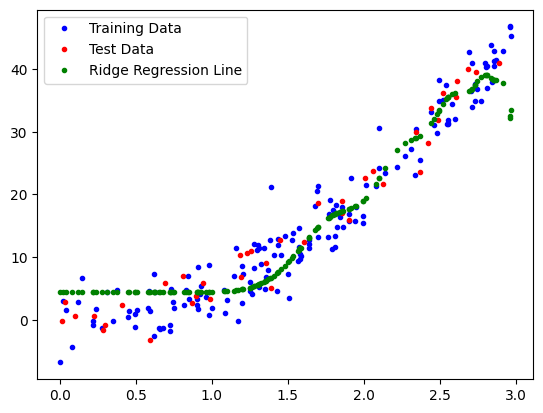

In [57]:
plt.plot(X_train,y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.plot(X_train,ridge.predict(X_train_pf),'g.',label='Ridge Regression Line')
plt.legend()
plt.show()

# Trying for different values of alpha

In [59]:
def ridge_regression(alpha=5):
  ridge = Ridge(alpha=alpha)
  X_train_ridge = ridge.fit(X_train_pf,y_train)
  y_pred1 = ridge.predict(X_test_pf)
  print('MSE : ',mean_squared_error(y_test,y_pred1))
  print('R2_Score : ',r2_score(y_test,y_pred1))
  print('******************Ridge Regression with alpha = {}***********************'.format(alpha))
  plt.plot(X_train,y_train,'b.',label='Training Data')
  plt.plot(X_test,y_test,'r.',label='Test Data')
  plt.plot(X_train,ridge.predict(X_train_pf),'y.',label='Ridge Regression Line')
  plt.legend()
  plt.show()

MSE :  11.206116122475034
R2_Score :  0.9390710691673886
******************Ridge Regression with alpha = 0.1***********************


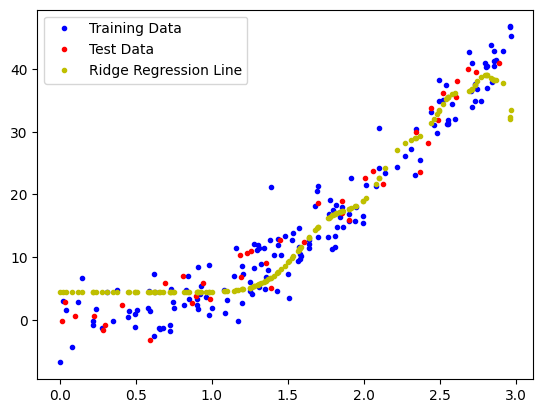

MSE :  11.205979777089969
R2_Score :  0.9390718104927903
******************Ridge Regression with alpha = 0.4***********************


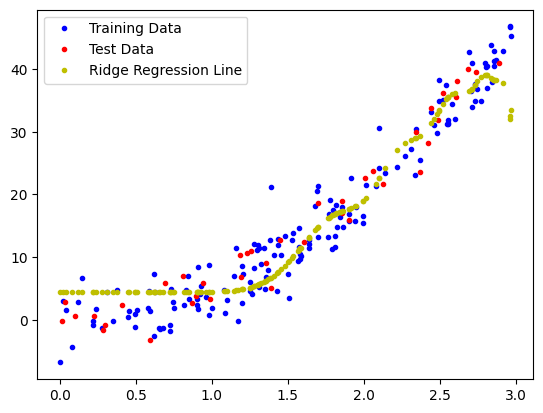

MSE :  11.206672524505233
R2_Score :  0.9390680439461216
******************Ridge Regression with alpha = 0.7***********************


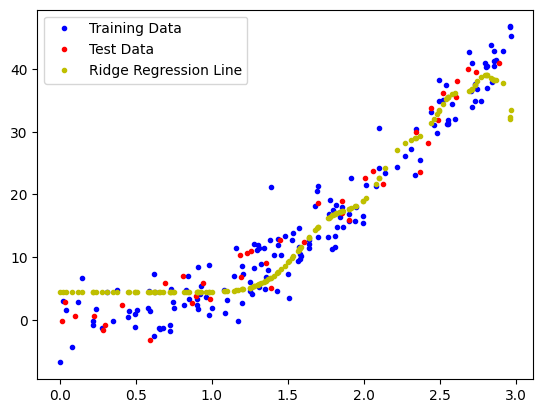

MSE :  11.206201984333182
R2_Score :  0.9390706023266777
******************Ridge Regression with alpha = 1.0***********************


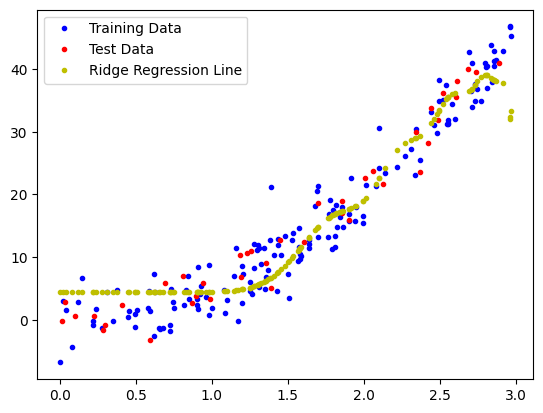

In [61]:
for i in range(1,11,3):
  ridge_regression(i/10)